# D4P 

## Subjective Data

### Collect and store the data from the CSV files in a multi-dimensional list

In [1]:
import csv

subjective_tables = ["BH_Subjective.csv",
                     "DL_Subjective.csv",
                     "EV_Subjective.csv",
                     "JF_Subjective.csv",
                     "LV_Subjective.csv"]

s_table = [[[], [], [], [], []],     # BH_Subjective_Table at all 5 time points
           [[], [], [], [], []],     # DL_Subjective_Table at all 5 time points
           [[], [], [], [], []],     # EV_Subjective_Table at all 5 time points
           [[], [], [], [], []],     # JF_Subjective_Table at all 5 time points
           [[], [], [], [], []]]     # LV_Subjective_Table at all 5 time points

labels = []

i = 0 
for i in range (len(subjective_tables)):
    with open (subjective_tables[i]) as csvfile:             # Open each CSV file
        readCSV = csv.reader(csvfile, delimiter=",")        # Collect & store comma-separated values  
        j = i  
        for row in readCSV:
            labels.append(row[0])
            s_table[j][0].append(row[1])
            s_table[j][1].append(row[2])
            s_table[j][2].append(row[3])
            s_table[j][3].append(row[4])
            s_table[j][4].append(row[5])
        i += 1
labels = labels[:20]

### Convert List of Strings (sequences of characters) to List of integers for statistical analysis

In [2]:
f_table = [[[], [], [], [], []],     # BH Frequency of intervention at all 5 time points
           [[], [], [], [], []],     # DL Frequency of intervention at all 5 time points
           [[], [], [], [], []],     # EV Frequency of intervention at all 5 time points
           [[], [], [], [], []],     # JF Frequency of intervention at all 5 time points
           [[], [], [], [], []]]     # LV Frequency of intervention at all 5 time points

i = 0
j = 0
for i in range(len(s_table)):
    for j in range(len(s_table[i])):
        s_table[i][j].pop(0)                                   # Remove the first (date) element from the list
        f_table[i][j].append(s_table[i][j][0]); s_table[i][j].pop(0) # Cut "How often did you use the dance system"
        f_table[i][j].append(s_table[i][j][0]); s_table[i][j].pop(0) # Cut "How long was your average session"
        f_table[i][j].append(s_table[i][j][0]); s_table[i][j].pop(0) # Cut "Did you use RAS?"
        s_table[i][j] = [int(x) for x in s_table[i][j]]        # Convert strings to ints
        j += 1
    i += 1

labels = labels[4:] # remove date and first three questions
print labels

['I feel restless', 'I feel focused', 'I have difficulties sleeping', 'I feel calm', 'I feel depressed/sad', 'I feel stressed/anxious', 'I feel happy, excited, or cheerful', 'I feel like keeping to myself', 'I feel relaxed', 'I feel energized', 'I feel tired/fatigued', 'I feel motivated to complete tasks', 'I enjoy communicating with others', 'I have difficulties concentrating', 'I have difficulties staying awake', 'I feel discouraged']


### Wilcoxon Signed-Rank Test

#### Compare subjective scores within-group at 2 timepoints (either baseline or intervention). Do this for each score (restless, focused etc.) and record the significance of each. Use a non-parametric test (Wilcoxon Signed-Rank) because this is ordinal data (does not follow a normal distribution).

In [3]:
from scipy.stats import wilcoxon

# Computes the Wilcoxon Signed-Rank Test at two timepoints: Initial and Final
def d4p_wilcoxon(timepoint_i, timepoint_f):
    p_values = []     # List of the p-values for each score (e.g. Speech, Facial Expression, etc.)
    questionNum = 0   # Number characterizing the score (e.g. restless = 0; focus = 1; etc.)
    for questionNum in range(len(labels)):
        list_i = []    # List of scores for each question at the initial timepoint
        list_f = []    # List of scores for each question at the final timepoint
        i = 0
        for i in range(len(s_table)):
            list_i.append(s_table[i][timepoint_i][questionNum])
            list_f.append(s_table[i][timepoint_f][questionNum])
        z_statistic, p_value = wilcoxon(list_i, list_f)
        p_values.append(p_value)
    return p_values

## All Statistical Values Between All Timepoints

In [4]:
def printSig(timepoint_i, timepoint_f):
    p_values = d4p_wilcoxon(timepoint_i, timepoint_f)
    for i in range(len(labels)):
        print labels[i], "--  p-Value: ", p_values[i]

print('Timepoints 0 - 1: ')
printSig(0,1); print('\n')
print('Timepoints 0 - 2: ')
printSig(0,1); print('\n')
print('Timepoints 0 - 3: ')
printSig(0,1); print('\n')
print('Timepoints 0 - 4: ')
printSig(0,1); print('\n')
print('Timepoints 1 - 2: ')
printSig(0,1); print('\n')
print('Timepoints 1 - 3: ')
printSig(0,1); print('\n')
print('Timepoints 1 - 4: ')
printSig(0,1); print('\n')
print('Timepoints 2 - 3: ')
printSig(0,1); print('\n')
print('Timepoints 2 - 4: ')
printSig(0,1); print('\n')
print('Timepoints 3 - 4: ')
printSig(0,1); print('\n')

Timepoints 0 - 1: 
I feel restless --  p-Value:  1.0
I feel focused --  p-Value:  0.31731050786291415
I have difficulties sleeping --  p-Value:  0.15729920705028502
I feel calm --  p-Value:  0.31731050786291415
I feel depressed/sad --  p-Value:  nan
I feel stressed/anxious --  p-Value:  nan
I feel happy, excited, or cheerful --  p-Value:  nan
I feel like keeping to myself --  p-Value:  nan
I feel relaxed --  p-Value:  0.31731050786291415
I feel energized --  p-Value:  0.31731050786291415
I feel tired/fatigued --  p-Value:  0.31731050786291415
I feel motivated to complete tasks --  p-Value:  0.15729920705028502
I enjoy communicating with others --  p-Value:  nan
I have difficulties concentrating --  p-Value:  0.31731050786291415
I have difficulties staying awake --  p-Value:  0.5637028616507731
I feel discouraged --  p-Value:  1.0


Timepoints 0 - 2: 
I feel restless --  p-Value:  1.0
I feel focused --  p-Value:  0.31731050786291415
I have difficulties sleeping --  p-Value:  0.157299207

/home/mbalas/.local/lib/python2.7/site-packages/scipy/stats/morestats.py:2385: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/mbalas/.local/lib/python2.7/site-packages/scipy/stats/morestats.py:2410: RuntimeWarning: invalid value encountered in double_scalars
  z = (T - mn - correction) / se


## All Statistically Significant (0.10 level) Values Between All Timepoints

In [5]:
def any_sig(siglevel):
    boole = False
    for ti in range(4):
        for tf in range(ti+1, 5):
                p_values = d4p_wilcoxon(ti, tf)
                for val in range(len(p_values)):
                    if p_values[val] <= siglevel:
                        print 'Timepoints ',ti,'-',tf,':\n',labels[val],'-- p-Value: ',p_values[val]
                        boole = True
    if boole == False:
        print 'There are no statistically significant values under the level of: ',siglevel
    return boole

any_sig(0.10)

Timepoints  0 - 3 :
I have difficulties sleeping -- p-Value:  0.0832645166635504
Timepoints  0 - 4 :
I have difficulties sleeping -- p-Value:  0.0832645166635504
Timepoints  0 - 4 :
I feel energized -- p-Value:  0.0832645166635504
Timepoints  1 - 4 :
I feel motivated to complete tasks -- p-Value:  0.0832645166635504


True

### The Significance Found at the 0.10 Level includes difficulties sleeping, energy and motivation (all at timepoints 0-3/4 and 1-4)

### Plot of the Graph for the Energy Scores for Each Subject at Each Timepoint

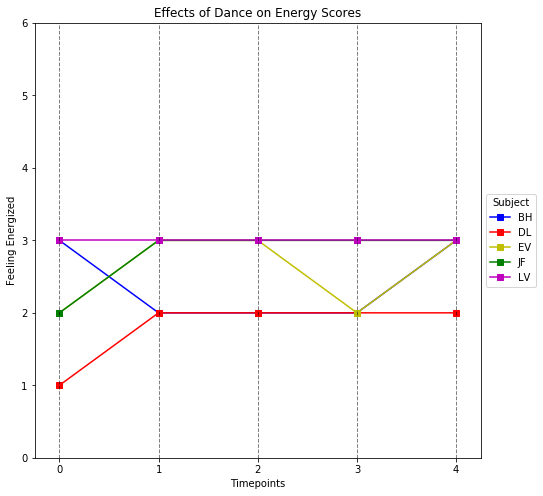

In [6]:
import matplotlib.pyplot as plt
from collections import OrderedDict


t = [0, 1, 2, 3, 4]
line = ['bs-', 'rs-', 'ys-', 'gs-', 'ms-']
subject = ["BH", "DL", "EV", "JF", "LV"]

plt.figure(figsize=(8,8))


for i in range(len(s_table)):
    temp = []; temp2 = []
    for j in range(5):
        temp.append(s_table[i][j][9]) #energy
    plt.plot(t, temp, line[i], label=subject[i])
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5), title="Subject")

plt.axis([-0.25, 4.25, 0, 6])
plt.xticks(t)

plt.xlabel('Timepoints')
plt.ylabel('Feeling Energized')
plt.title('Effects of Dance on Energy Scores')

for x in t:
    plt.axvline(x, linewidth=1, color='black', ls='--', alpha = 0.5)

plt.show()

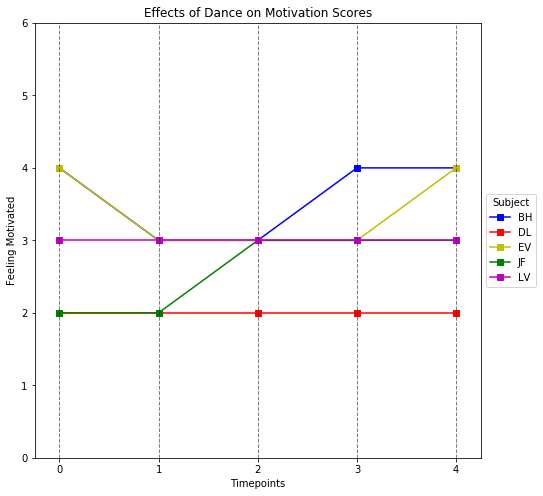

In [7]:
import matplotlib.pyplot as plt
from collections import OrderedDict


t = [0, 1, 2, 3, 4]
line = ['bs-', 'rs-', 'ys-', 'gs-', 'ms-']
subject = ["BH", "DL", "EV", "JF", "LV"]

plt.figure(figsize=(8,8))


for i in range(len(s_table)):
    temp = []; temp2 = []
    for j in range(5):
        temp.append(s_table[i][j][11]) #motivation
    plt.plot(t, temp, line[i], label=subject[i])
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5), title="Subject")

plt.axis([-0.25, 4.25, 0, 6])
plt.xticks(t)

plt.xlabel('Timepoints')
plt.ylabel('Feeling Motivated')
plt.title('Effects of Dance on Motivation Scores')

for x in t:
    plt.axvline(x, linewidth=1, color='black', ls='--', alpha = 0.5)

plt.show()